In [168]:
import pandas as pd
import seaborn as sns

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16,8

In [169]:
df_player = pd.read_csv("../player.csv")
df_history = pd.read_csv("../player_history.csv")

print(f"{df_player.shape[0]} players, {df_history.shape[0]} history items")

3124 players, 17652 history items


In [170]:
df_player.head()

,player_id,name,birthday,item
0,12,Riive Tamm,17.11.1974,player_item
1,17,Ela Vulla,16.12.1979,player_item
2,18,Kaidi Aosaar,28.05.1987,player_item
3,19,Kert Jusar,14.04.1982,player_item
4,11,Triinu Saluste,04.02.1993,player_item


In [171]:
df_history.head()

,season,team,player_id,item,league_name,n_games,n_goals,n_passes
0,2011 / 2012,Tamsalu EBE,12,player_history_item,Naiste liiga,14,0,1
1,2014 / 2015,Team PPT,17,player_history_item,Naiste esiliiga,8,2,3
2,2011 / 2012,Tamsalu EBE,17,player_history_item,Naiste liiga,14,1,1
3,2017 / 2018,Arenculle,18,player_history_item,Naiste esiliiga,4,0,0
4,2016 / 2017,Arenculle,18,player_history_item,Naiste esiliiga,0,0,0


[Text(0, 0.5, '# of player-games'), (0.0, 12598.55)]

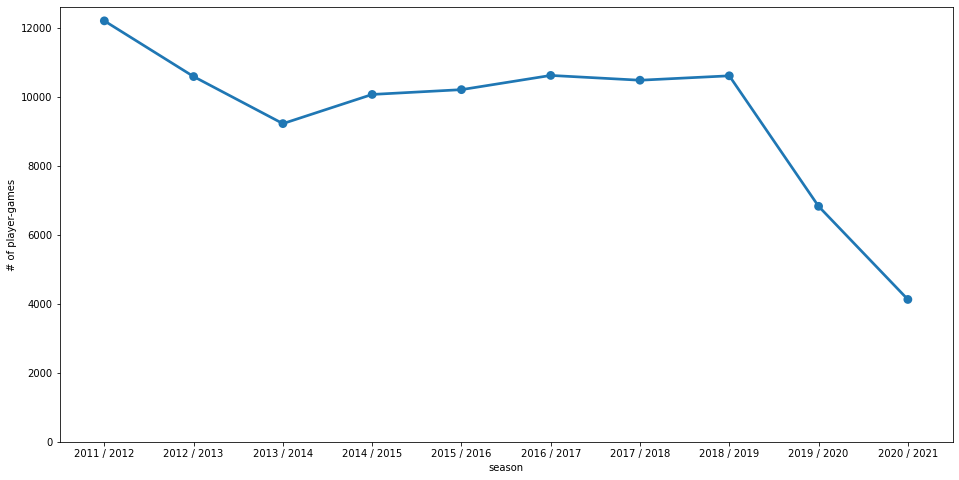

In [172]:
# Player-games by season
#sns.histplot(data=df_history, x="season")
pg_by_season = df_history.groupby(["season"]).sum()[["n_games"]].reset_index()
pg_by_season
ax = sns.pointplot(data=pg_by_season, x="season", y="n_games")
ax.set(ylabel='# of player-games', ylim=(0, None))

In [173]:
games_by_season = df_history.groupby(["player_id", "season"]).sum()[["n_games"]].reset_index()

In [174]:
players_by_season = games_by_season.groupby(["season"]).count()["player_id"].reset_index()
p5_by_season = games_by_season[games_by_season["n_games"] >= 5]

players_by_season["condition"] = "registered"
p5_by_season_result = p5_by_season.groupby(["season"]).count()["player_id"].reset_index()
p5_by_season_result["condition"] = ">=5 games"

counts_by_season = pd.concat([players_by_season, p5_by_season_result]).reset_index(drop=True)

counts_by_season

,season,player_id,condition
0,2011 / 2012,1136,registered
1,2012 / 2013,1037,registered
2,2013 / 2014,953,registered
3,2014 / 2015,938,registered
4,2015 / 2016,1052,registered
5,2016 / 2017,980,registered
6,2017 / 2018,938,registered
7,2018 / 2019,993,registered
8,2019 / 2020,891,registered
9,2020 / 2021,842,registered


[Text(0, 0.5, '# of players'), (0.0, 1174.6)]

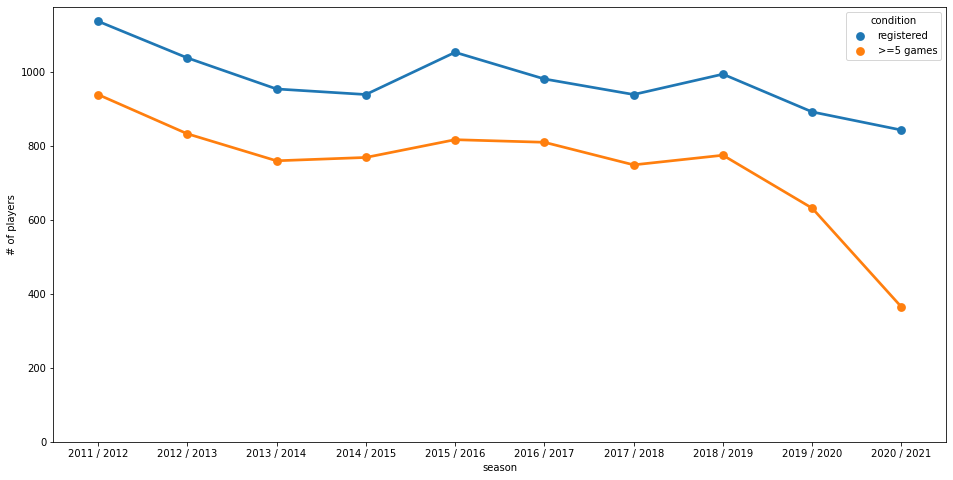

In [175]:
ax = sns.pointplot(data=counts_by_season, x="season", y="player_id", hue="condition")
ax.set(ylabel='# of players', ylim=(0, None))